In [75]:
import pandas as pd 
import requests 
import json 
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
URL = "https://www.yelp.com/biz/7bO6OHn52SJP4Mi3U-XflQ/review_feed?rl=en&q=&sort_by=relevance_desc"
rating = []
review = []
def get_text(start, end):
    
    for i in range(start, end, 10):
        resp = requests.get(URL+"&start={}".format(i))
        resp = json.loads(resp.text)
        for ele in resp["reviews"]:
            comment = ele['comment']['text']
            rate = ele['rating']
            rating.append(rate)
            review.append(comment)
       
        #print(json.dumps(resp, indent=2))
         
get_text(0,300)
#print(rating)
#print(review)

#### The Word Cloud for 5 stars

In [113]:
print(len(review))
print(len(rating))

300
300


In [114]:
Top_review = []
for i in range(len(review)):
    if rating[i] ==5:
        Top_review.append(review[i])
print("There are total ", len(Top_review), " Top reviews")

There are total  196  Top reviews


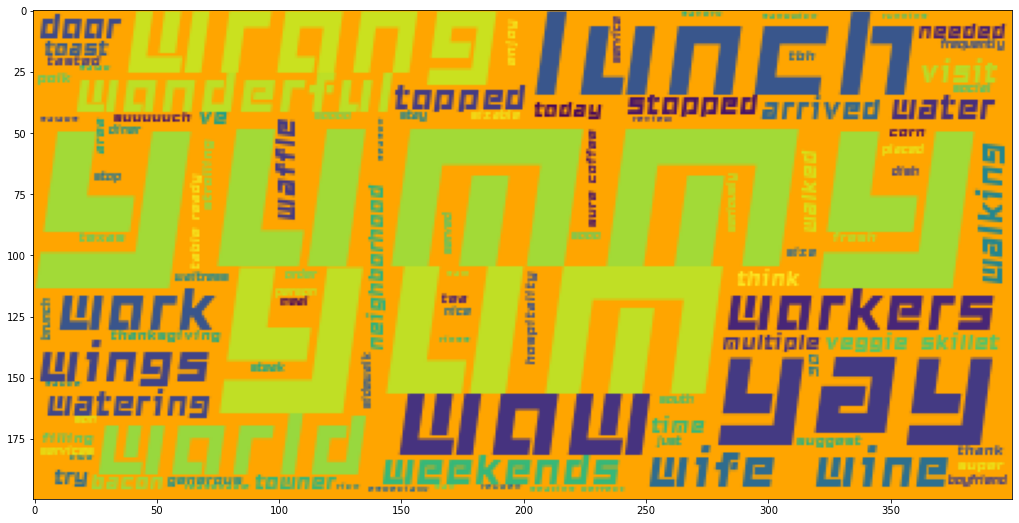

In [115]:
v = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
vect = v.fit_transform(Top_review).todense()
vec = vect.tolist()
#print(vec)
feature_names = v.get_feature_names()
Filter_review = set()
#print(vect.shape)
#print(vec)

for i in range(len(vec)):
    for j in range(len(vec[0])):
        if vec[i][j] >0.2:
            Filter_review.add(feature_names[j])
#print(Filter_review)

dic = v.vocabulary_
#print(type(dic))
result = dict()
record = set()
for key, val in dic.items():
    if key in Filter_review:
        tmp = key.split(" ")
        s = ""
        for ele in tmp:
            if ele not in record:
                if s != "":
                    s += " "+ele
                else:
                    s = ele
                record.add(ele)
            key = s
        result[key] = val
wc = wordcloud.WordCloud(font_path = "style.ttf",background_color="orange")
wc.fit_words(result)
plt.figure(figsize=(20,9))
plt.imshow(wc)            

#### The Word Cloud for 1/2 stars

In [120]:
bot_review = []
for i in range(len(review)):
    if rating[i] <=2:
        bot_review.append(review[i])
print("There are total ", len(bot_review), " bottom reviews")
v = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
vect = v.fit_transform(bot_review).todense()
vec = vect.tolist()
feature_names = v.get_feature_names()
Filter_review = set()
#print(vect.shape)
#print(vec)

for i in range(len(vec)):
    for j in range(len(vec[0])):
        if vec[i][j] >0.15:
            Filter_review.add(feature_names[j])
#print(Filter_review)
            

There are total  18  bottom reviews


<class 'dict'>


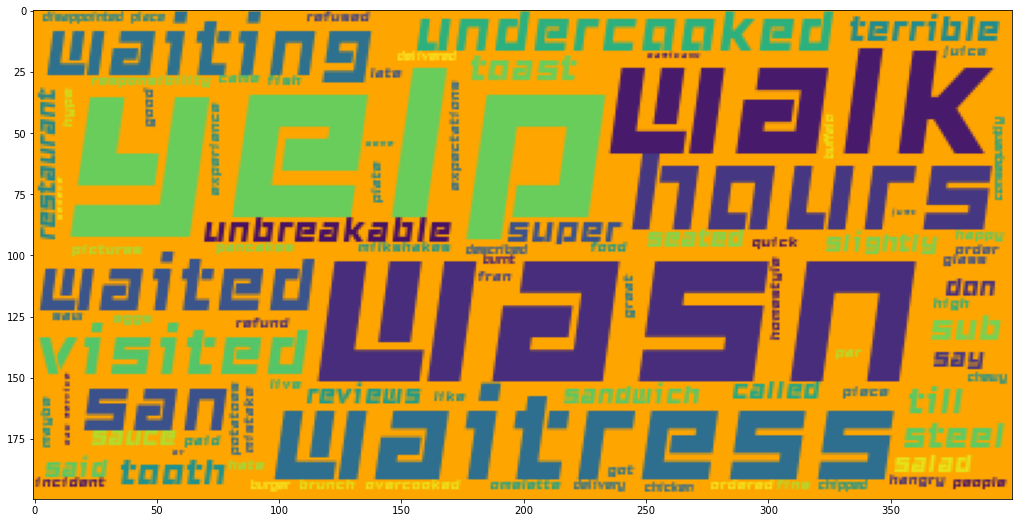

In [121]:

dic = v.vocabulary_
print(type(dic))
result = dict()
record = set()
for key, val in dic.items():
    if key in Filter_review:
        tmp = key.split(" ")
        s = ""
        for ele in tmp:
            if ele not in record:
                if s != "":
                    s += " "+ele
                else:
                    s = ele
                record.add(ele)
            key = s
        result[key] = val
wc = wordcloud.WordCloud(font_path = "style.ttf",background_color="orange")
wc.fit_words(result)
plt.figure(figsize=(20,9))
plt.imshow(wc)

#### For Total Reviews:

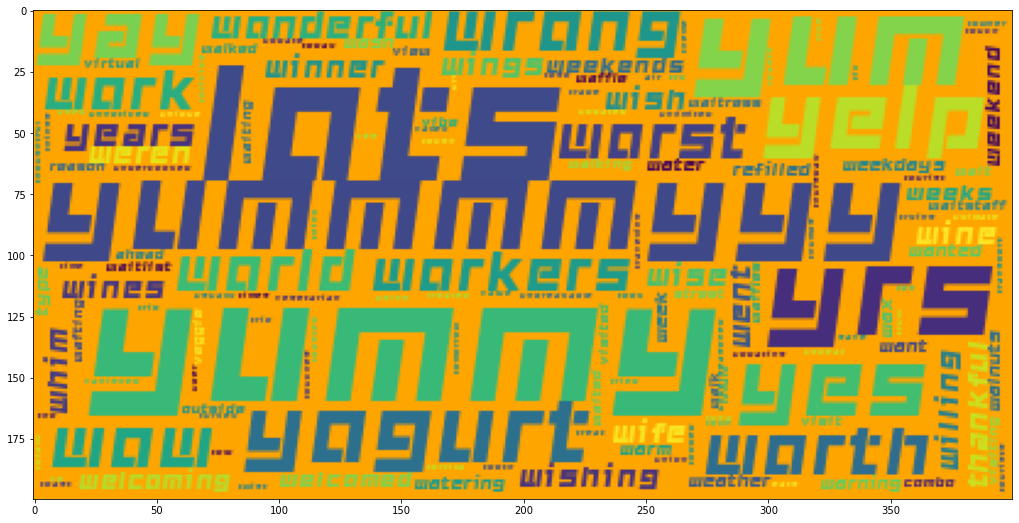

In [122]:
v = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
vect = v.fit_transform(review).todense()
vec = vect.tolist()
#print(vec)
feature_names = v.get_feature_names()
Filter_review = set()
#print(vect.shape)
#print(vec)

for i in range(len(vec)):
    for j in range(len(vec[0])):
        if vec[i][j] >0.12:
            Filter_review.add(feature_names[j])
#print(Filter_review)

dic = v.vocabulary_
#print(type(dic))
result = dict()
record = set()
for key, val in dic.items():
    if key in Filter_review:
        tmp = key.split(" ")
        s = ""
        for ele in tmp:
            if ele not in record:
                if s != "":
                    s += " "+ele
                else:
                    s = ele
                record.add(ele)
            key = s
        result[key] = val
wc = wordcloud.WordCloud(font_path = "style.ttf",background_color="orange")
wc.fit_words(result)
plt.figure(figsize=(20,9))
plt.imshow(wc)  